# Graphs

### The aim is to express clusters of rechits as graphs, in a format compatible with the 'GraphsTuple' of the graph_net.py library of deepmind

In [202]:
import uproot
path = '/pnfs/psi.ch/cms/trivcat/store/user/mratti/Dumper/'
fn = path + 'photon_E1to100GeV_closeEcal_EB_noPU_thrsLumi450_pfrh3.0_seed3.0_noMargin_thrRingEBXtalEE_shs1.0_maxd10.0_l450_P01_n10_njd0.root'
file = uproot.open(fn)
events = file['recosimdumper']['caloTree']
events.show()
events.numentries

eventId                    (no streamer)              asdtype('>i8')
lumiId                     (no streamer)              asdtype('>i4')
runId                      (no streamer)              asdtype('>i4')
nVtx                       (no streamer)              asdtype('>i4')
rho                        (no streamer)              asdtype('>f4')
genParticle_id             TStreamerSTL               asjagged(asdtype('>i4'), 10)
genParticle_isGammaFromMeson
                           TStreamerSTL               asjagged(asdtype('bool'), 10)
genParticle_energy         TStreamerSTL               asjagged(asdtype('>f4'), 10)
genParticle_pt             TStreamerSTL               asjagged(asdtype('>f4'), 10)
genParticle_eta            TStreamerSTL               asjagged(asdtype('>f4'), 10)
genParticle_phi            TStreamerSTL               asjagged(asdtype('>f4'), 10)
genParticle_pfCluster_dR_genScore_MatchedIndex
                           TStreamerSTL               asgenobj(STLVector(STLVect

10

##### Create some data structure with these arrays, to make the handling more compact

In [4]:
class RecoGraph(object):
  def __init__(self,energy,ieta,iphi):
    self.energy=energy
    #self.isseed=isseed # boolean
    self.ieta=ieta
    self.iphi=iphi

In [5]:
class SimGraph(object):
  def __init__(self,energy,ieta,iphi,icalo):
    self.energy=energy
    #self.isseed=isseed # boolean
    self.ieta=ieta
    self.iphi=iphi
    self.icalo=icalo

##### Get the arrays from the file - for one event 

In [161]:
# create a pandas dataframe for making selections in a simple way 
import pandas as pd
simdf = pd.DataFrame({'energy': events.array('simHit_energy')[0], 
                      'ieta': events.array('simHit_ieta')[0],
                      'iphi': events.array('simHit_iphi')[0],
                     })
simdf

,energy,ieta,iphi
0,0.000064,-8,3
1,0.000110,-8,101
2,0.000511,-12,34
3,0.001579,-12,309
4,0.001253,-12,310
5,0.000958,-14,146
6,0.000016,-17,34
7,0.000039,-19,275
8,0.000138,-20,38
9,0.000040,-23,39


In [187]:
simdf_10MeV = simdf[simdf['energy'] > 0.01] # select only above 10 MeV
simdf_10MeV.shape[0] == simdf_10MeV.energy.to_numpy().shape[0]

True

In [242]:
simdf_10MeV

,energy,ieta,iphi
15,0.010013,-30,41
32,0.025024,-38,319
66,0.017498,-43,335
72,0.036403,-44,330
74,0.013516,-44,335
108,0.011615,-48,333
110,0.012920,-48,335
127,0.013968,-49,331
128,0.014312,-49,332
129,0.036486,-49,333


In [243]:
simdf_10MeV.reset_index()

,index,energy,ieta,iphi
0,15,0.010013,-30,41
1,32,0.025024,-38,319
2,66,0.017498,-43,335
3,72,0.036403,-44,330
4,74,0.013516,-44,335
5,108,0.011615,-48,333
6,110,0.012920,-48,335
7,127,0.013968,-49,331
8,128,0.014312,-49,332
9,129,0.036486,-49,333


,energy,ieta,iphi
15,0.010013,-30,41
32,0.025024,-38,319
66,0.017498,-43,335
72,0.036403,-44,330
74,0.013516,-44,335
108,0.011615,-48,333
110,0.012920,-48,335
127,0.013968,-49,331
128,0.014312,-49,332
129,0.036486,-49,333


In [6]:

s0 = SimGraph(energy=events.array('simHit_energy')[0], ieta=events.array('simHit_ieta')[0], iphi=events.array('simHit_iphi')[0], icalo=events.array('simHit_icP')[0])
r0 = RecoGraph(energy=events.array('pfRecHit_energy')[0],ieta=events.array('pfRecHit_ieta')[0],iphi=events.array('pfRecHit_iphi')[0])


# Node features for graph 0.
GN_nodes_0 = [[10., 20., 30.],  # Node 0
           [11., 21., 31.],  # Node 1
           [12., 22., 32.],  # Node 2
           [13., 23., 33.],  # Node 3
           [14., 24., 34.]]  # Node 4

import numpy as np


stack = np.vstack((r0.energy,r0.ieta,r0.iphi))

In [7]:
stack

array([[  1.31174731,   1.38144898,   0.61270899,   2.66144609,
          3.15228105,   0.73855901,   6.49196672,   2.96968722,
          0.67836297,  31.49000549,  10.62813091,   1.12608075,
         43.93410873,  19.55381012,   0.9343257 ,   0.5970161 ,
          0.63212472,   0.72939306,   1.68493092,   1.63189316,
          0.69715029],
       [-51.        , -51.        , -51.        , -51.        ,
        -51.        , -51.        , -52.        , -52.        ,
        -52.        , -52.        , -52.        , -52.        ,
        -52.        , -52.        , -52.        , -53.        ,
        -53.        , -53.        , -53.        , -53.        ,
         71.        ],
       [214.        , 215.        , 333.        , 334.        ,
        335.        , 336.        ,  94.        ,  95.        ,
        213.        , 214.        , 215.        , 333.        ,
        334.        , 335.        , 336.        , 214.        ,
        215.        , 333.        , 334.        , 335.    

In [8]:
stack.shape

(3, 21)

In [9]:
tstack = stack.transpose()

In [10]:
tstack.shape

(21, 3)

In [11]:
tstack

array([[  1.31174731, -51.        , 214.        ],
       [  1.38144898, -51.        , 215.        ],
       [  0.61270899, -51.        , 333.        ],
       [  2.66144609, -51.        , 334.        ],
       [  3.15228105, -51.        , 335.        ],
       [  0.73855901, -51.        , 336.        ],
       [  6.49196672, -52.        ,  94.        ],
       [  2.96968722, -52.        ,  95.        ],
       [  0.67836297, -52.        , 213.        ],
       [ 31.49000549, -52.        , 214.        ],
       [ 10.62813091, -52.        , 215.        ],
       [  1.12608075, -52.        , 333.        ],
       [ 43.93410873, -52.        , 334.        ],
       [ 19.55381012, -52.        , 335.        ],
       [  0.9343257 , -52.        , 336.        ],
       [  0.5970161 , -53.        , 214.        ],
       [  0.63212472, -53.        , 215.        ],
       [  0.72939306, -53.        , 333.        ],
       [  1.68493092, -53.        , 334.        ],
       [  1.63189316, -53.     

In [12]:
nodes_0 = tstack.tolist()
nodes_0
#### note that this converts integers to floats... not good! but best thing I can do at this moment
#### list(tstack) ### not working as expected...!

[[1.3117473125457764, -51.0, 214.0],
 [1.3814489841461182, -51.0, 215.0],
 [0.6127089858055115, -51.0, 333.0],
 [2.6614460945129395, -51.0, 334.0],
 [3.1522810459136963, -51.0, 335.0],
 [0.7385590076446533, -51.0, 336.0],
 [6.491966724395752, -52.0, 94.0],
 [2.9696872234344482, -52.0, 95.0],
 [0.6783629655838013, -52.0, 213.0],
 [31.490005493164062, -52.0, 214.0],
 [10.628130912780762, -52.0, 215.0],
 [1.1260807514190674, -52.0, 333.0],
 [43.93410873413086, -52.0, 334.0],
 [19.553810119628906, -52.0, 335.0],
 [0.9343256950378418, -52.0, 336.0],
 [0.5970160961151123, -53.0, 214.0],
 [0.6321247220039368, -53.0, 215.0],
 [0.7293930649757385, -53.0, 333.0],
 [1.6849309206008911, -53.0, 334.0],
 [1.6318931579589844, -53.0, 335.0],
 [0.6971502900123596, 71.0, 213.0]]

In [13]:
# Edge features for graph 0.
GN_edges_0 = [[100., 200.],  # Edge 0
              [101., 201.],  # Edge 1
              [102., 202.],  # Edge 2
              [103., 203.],  # Edge 3
              [104., 204.],  # Edge 4
              [105., 205.]]  # Edge 5

# The sender and receiver nodes associated with each edge for graph 0.
GN_senders_0 = [0,  # Index of the sender node for edge 0
             1,  # Index of the sender node for edge 1
             1,  # Index of the sender node for edge 2
             2,  # Index of the sender node for edge 3
             2,  # Index of the sender node for edge 4
             3]  # Index of the sender node for edge 5
GN_receivers_0 = [1,  # Index of the receiver node for edge 0
               2,  # Index of the receiver node for edge 1
               3,  # Index of the receiver node for edge 2
               0,  # Index of the receiver node for edge 3
               3,  # Index of the receiver node for edge 4
               4]  # Index of the receiver node for edge 5

In [14]:
edges_0 = []
senders_0 = []
receivers_0 = []
for i,inode in enumerate(nodes_0): 
  for j,jnode in enumerate(nodes_0):
    if i==j: continue # do not create a self-edge
    #if i>j: continue  # create edges in one direction only ? 
    ### for the moment creating a copy of the edge in two directions
    # edge ij 
    #print ('working on node{}-node{}'.format(i,j))
    score = -1
    denergy = inode[0] - jnode[0]
    dieta = inode[1] - jnode[1]
    diphi = inode[2] - jnode[2]
    edges_0.append([denergy,dieta,diphi]) 
    senders_0.append(i)
    receivers_0.append(j)
    # to be honest it does not seem right to let the edge features evolve 
    #print ('  node i=', inode)
    #print ('  node j=', jnode)
    #score = inode[]
    
    #deta = 

In [15]:
globals_0 = []

In [16]:
data_dict_0 = {
    "globals": globals_0,
    "nodes": nodes_0,
    "edges": edges_0,
    "senders": senders_0,
    "receivers": receivers_0
}

In [17]:
import graph_nets as gn
import matplotlib.pyplot as plt
import networkx as nx

In [18]:
data_dict_list = [data_dict_0]
graphs_tuple = gn.utils_np.data_dicts_to_graphs_tuple(data_dict_list)

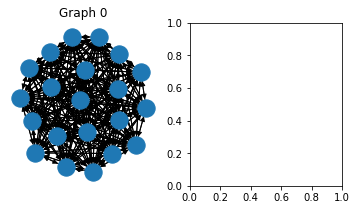

In [19]:
graphs_nx = gn.utils_np.graphs_tuple_to_networkxs(graphs_tuple)
_, axs = plt.subplots(ncols=2, figsize=(6, 3))
for iax, (graph_nx, ax) in enumerate(zip(graphs_nx, axs)):
  nx.draw(graph_nx, ax=ax)
  ax.set_title("Graph {}".format(iax))

In [20]:
len(nodes_0)

21

In [21]:
len(edges_0)

420

In [22]:
nodes_0

[[1.3117473125457764, -51.0, 214.0],
 [1.3814489841461182, -51.0, 215.0],
 [0.6127089858055115, -51.0, 333.0],
 [2.6614460945129395, -51.0, 334.0],
 [3.1522810459136963, -51.0, 335.0],
 [0.7385590076446533, -51.0, 336.0],
 [6.491966724395752, -52.0, 94.0],
 [2.9696872234344482, -52.0, 95.0],
 [0.6783629655838013, -52.0, 213.0],
 [31.490005493164062, -52.0, 214.0],
 [10.628130912780762, -52.0, 215.0],
 [1.1260807514190674, -52.0, 333.0],
 [43.93410873413086, -52.0, 334.0],
 [19.553810119628906, -52.0, 335.0],
 [0.9343256950378418, -52.0, 336.0],
 [0.5970160961151123, -53.0, 214.0],
 [0.6321247220039368, -53.0, 215.0],
 [0.7293930649757385, -53.0, 333.0],
 [1.6849309206008911, -53.0, 334.0],
 [1.6318931579589844, -53.0, 335.0],
 [0.6971502900123596, 71.0, 213.0]]

In [23]:
tstack 

array([[  1.31174731, -51.        , 214.        ],
       [  1.38144898, -51.        , 215.        ],
       [  0.61270899, -51.        , 333.        ],
       [  2.66144609, -51.        , 334.        ],
       [  3.15228105, -51.        , 335.        ],
       [  0.73855901, -51.        , 336.        ],
       [  6.49196672, -52.        ,  94.        ],
       [  2.96968722, -52.        ,  95.        ],
       [  0.67836297, -52.        , 213.        ],
       [ 31.49000549, -52.        , 214.        ],
       [ 10.62813091, -52.        , 215.        ],
       [  1.12608075, -52.        , 333.        ],
       [ 43.93410873, -52.        , 334.        ],
       [ 19.55381012, -52.        , 335.        ],
       [  0.9343257 , -52.        , 336.        ],
       [  0.5970161 , -53.        , 214.        ],
       [  0.63212472, -53.        , 215.        ],
       [  0.72939306, -53.        , 333.        ],
       [  1.68493092, -53.        , 334.        ],
       [  1.63189316, -53.     

In [24]:
# learn how to properly iterate over e.g. 2D arrays 


In [25]:
s0.icalo[1]

0

In [26]:
s0.icalo.shape

(820,)

In [27]:
s0.iphi.shape

(820,)

In [28]:
import numpy as np
ststack = np.vstack((s0.energy,s0.ieta,s0.iphi)).T
snodes_0 = ststack.tolist()

sedges_0 = []
ssenders_0 = []
sreceivers_0 = []
for i,inode in enumerate(snodes_0):
  for j,jnode in enumerate(snodes_0):
    if i==j: continue # do not create a self-edge
    score = -1
    denergy = inode[0] - jnode[0]
    dieta = inode[1] - jnode[1]
    diphi = inode[2] - jnode[2]
    if s0.icalo[i]==s0.icalo[j]:  # # build edge only if r and s belong to the same caloparticle
      sedges_0.append([denergy,dieta,diphi])
      ssenders_0.append(i)
      sreceivers_0.append(j)

sglobals_0 = []

sdata_dict_0 = {
    "globals": sglobals_0,
    "nodes": snodes_0,
    "edges": sedges_0,
    "senders": ssenders_0,
    "receivers": sreceivers_0
}





In [29]:
len(snodes_0)

820

In [30]:
len(sedges_0)

328830

In [31]:
reco_graphs_tuple = gn.utils_np.data_dicts_to_graphs_tuple([data_dict_0])
#sim_graphs_tuple = gn.utils_np.data_dicts_to_graphs_tuple([sdata_dict_0])





In [32]:
graphs_nx_reco = gn.utils_np.graphs_tuple_to_networkxs(reco_graphs_tuple)
#graphs_nx_sim = gn.utils_np.graphs_tuple_to_networkxs(sim_graphs_tuple)


In [33]:
graphs_nx_reco

In [236]:
g=graphs_nx_reco[0]
g

In [35]:
len(g.nodes)

21

In [36]:
len(g.edges)

420

In [37]:
g.degree[3]

40

In [61]:
g.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20))

In [62]:
list(g.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [81]:
g.nodes[1]['features']

array([  1.38144898, -51.        , 215.        ])

In [68]:
# to which nodes is node 1 connected to?
list(g.adj[1])
# to all nodes, except for itself

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [67]:
list(g.adj[0])
# to all nodes, except for itself

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [69]:
# the number of edges incident on & from node 1
g.degree[1] 
# it's twice as what I had expected, because it has 20 nodes connected twice

40

In [79]:
for inode,neighbours in g.adj.items(): 
    for ineighbour,attrneighbour in neighbours.items():
      print('inode = ', inode, ' is neighbour to: ', ineighbour, ' with attributes:', attrneighbour)
     

inode =  0  is neighbour to:  1  with attributes: OrderedDict([(0, OrderedDict([('index', 0), ('features', array([-0.06970167,  0.        , -1.        ]))]))])
inode =  0  is neighbour to:  2  with attributes: OrderedDict([(0, OrderedDict([('index', 1), ('features', array([   0.69903833,    0.        , -119.        ]))]))])
inode =  0  is neighbour to:  3  with attributes: OrderedDict([(0, OrderedDict([('index', 2), ('features', array([  -1.34969878,    0.        , -120.        ]))]))])
inode =  0  is neighbour to:  4  with attributes: OrderedDict([(0, OrderedDict([('index', 3), ('features', array([  -1.84053373,    0.        , -121.        ]))]))])
inode =  0  is neighbour to:  5  with attributes: OrderedDict([(0, OrderedDict([('index', 4), ('features', array([   0.5731883,    0.       , -122.       ]))]))])
inode =  0  is neighbour to:  6  with attributes: OrderedDict([(0, OrderedDict([('index', 5), ('features', array([ -5.18021941,   1.        , 120.        ]))]))])
inode =  0  is n

inode =  14  is neighbour to:  13  with attributes: OrderedDict([(0, OrderedDict([('index', 293), ('features', array([-18.61948442,   0.        ,   1.        ]))]))])
inode =  14  is neighbour to:  15  with attributes: OrderedDict([(0, OrderedDict([('index', 294), ('features', array([  0.3373096,   1.       , 122.       ]))]))])
inode =  14  is neighbour to:  16  with attributes: OrderedDict([(0, OrderedDict([('index', 295), ('features', array([  0.30220097,   1.        , 121.        ]))]))])
inode =  14  is neighbour to:  17  with attributes: OrderedDict([(0, OrderedDict([('index', 296), ('features', array([0.20493263, 1.        , 3.        ]))]))])
inode =  14  is neighbour to:  18  with attributes: OrderedDict([(0, OrderedDict([('index', 297), ('features', array([-0.75060523,  1.        ,  2.        ]))]))])
inode =  14  is neighbour to:  19  with attributes: OrderedDict([(0, OrderedDict([('index', 298), ('features', array([-0.69756746,  1.        ,  1.        ]))]))])
inode =  14  

In [111]:
data_dict_0['nodes'][0:]

[[1.3117473125457764, -51.0, 214.0],
 [1.3814489841461182, -51.0, 215.0],
 [0.6127089858055115, -51.0, 333.0],
 [2.6614460945129395, -51.0, 334.0],
 [3.1522810459136963, -51.0, 335.0],
 [0.7385590076446533, -51.0, 336.0],
 [6.491966724395752, -52.0, 94.0],
 [2.9696872234344482, -52.0, 95.0],
 [0.6783629655838013, -52.0, 213.0],
 [31.490005493164062, -52.0, 214.0],
 [10.628130912780762, -52.0, 215.0],
 [1.1260807514190674, -52.0, 333.0],
 [43.93410873413086, -52.0, 334.0],
 [19.553810119628906, -52.0, 335.0],
 [0.9343256950378418, -52.0, 336.0],
 [0.5970160961151123, -53.0, 214.0],
 [0.6321247220039368, -53.0, 215.0],
 [0.7293930649757385, -53.0, 333.0],
 [1.6849309206008911, -53.0, 334.0],
 [1.6318931579589844, -53.0, 335.0],
 [0.6971502900123596, 71.0, 213.0]]

In [148]:
nodes_transpose = list(map(list,zip(*data_dict_0['nodes'])))

In [127]:
a = ['feature1', 'feature2']
b = [[3,45], [45,2]]
dict(zip(a,b))

{'feature1': [3, 45], 'feature2': [45, 2]}

In [147]:
a = ['2','xfr', 'r2wes']
b = list(filter( lambda x: 'r' in x , a))
b

['xfr', 'r2wes']

In [151]:
energies = nodes_transpose[0]
etas = nodes_transpose[1]
phis = nodes_transpose[2]

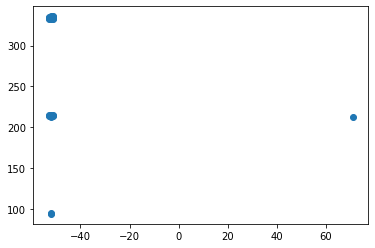

In [153]:
plt.figure()
plt.scatter(etas, phis)

In [154]:
sim_nodes_transpose = list(map(list,zip(*sdata_dict_0['nodes'])))

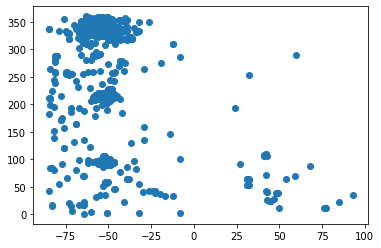

In [189]:
plt.figure()
plt.scatter(sim_nodes_transpose[1], sim_nodes_transpose[2])

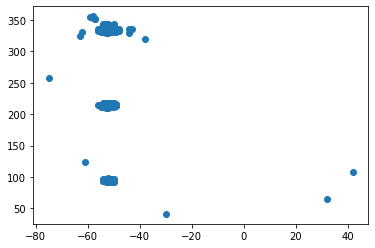

In [190]:
plt.figure()
plt.scatter(simdf_10MeV.ieta.to_numpy(), simdf_10MeV.iphi.to_numpy())

In [196]:
# example to access array from multiple files

path = '/pnfs/psi.ch/cms/trivcat/store/user/mratti/Dumper/'
fn1 = path + 'gjetEM_Et40toInfGeV_wTk_all_wPU_noiseCond2021_pfrh3.0-4.0_seed3.0-4.0_noMargin_thrRingEBXtalEE_shs1.0_maxd10.0_y2021_G5_v3_t3434_n2021_n-1_njd8.root'
fn2 = path + 'gjetEM_Et40toInfGeV_wTk_all_wPU_noiseCond2021_pfrh3.0-4.0_seed3.0-4.0_noMargin_thrRingEBXtalEE_shs1.0_maxd10.0_y2021_G5_v3_t3434_n2021_n-1_njd0.root'
simEta = uproot.lazyarray([fn1,fn2], 'recosimdumper/caloTree', 'caloParticle_simEta')


(22259,)

In [199]:
from collections import OrderedDict
odict = OrderedDict({ 'energy':'simHit_energy', 'ieta':'simHit_ieta', 'iphi':'simHit_iphi', 'icalo': 'simHit_icP'})

In [201]:
odict.keys()

odict_keys(['energy', 'ieta', 'iphi', 'icalo'])

In [209]:
simdf_10MeV.values.tolist()

[[0.010012832470238209, -30.0, 41.0],
 [0.025024043396115303, -38.0, 319.0],
 [0.01749848574399948, -43.0, 335.0],
 [0.03640279546380043, -44.0, 330.0],
 [0.013515605591237545, -44.0, 335.0],
 [0.011614900082349777, -48.0, 333.0],
 [0.012920456007122993, -48.0, 335.0],
 [0.013967504724860191, -49.0, 331.0],
 [0.01431169081479311, -49.0, 332.0],
 [0.036486465483903885, -49.0, 333.0],
 [0.02566613256931305, -49.0, 334.0],
 [0.039223358035087585, -49.0, 335.0],
 [0.05989354848861694, -49.0, 336.0],
 [0.03447222709655762, -50.0, 331.0],
 [0.09444208443164825, -50.0, 332.0],
 [0.10441859811544418, -50.0, 333.0],
 [0.20322856307029724, -50.0, 334.0],
 [0.31458553671836853, -50.0, 335.0],
 [0.1716446578502655, -50.0, 336.0],
 [0.03172311559319496, -50.0, 337.0],
 [0.06401855498552322, -50.0, 343.0],
 [0.027010824531316757, -51.0, 331.0],
 [0.07755830883979797, -51.0, 332.0],
 [0.5214340090751648, -51.0, 333.0],
 [2.669428825378418, -51.0, 334.0],
 [3.2396903038024902, -51.0, 335.0],
 [0.81443

In [235]:
simdf_10MeV.energy
simdf_10MeV.loc[15, 'energy']


0.0100128325